In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(r"C:\Users\yashika\Downloads\depression_dataset_reddit_cleaned.csv")
print(df.head())

                                          clean_text  is_depression
0  we understand that most people who reply immed...              1
1  welcome to r depression s check in post a plac...              1
2  anyone else instead of sleeping more when depr...              1
3  i ve kind of stuffed around a lot in my life d...              1
4  sleep is my greatest and most comforting escap...              1


In [4]:
df['clean_text'].iloc[0]

'we understand that most people who reply immediately to an op with an invitation to talk privately mean only to help but this type of response usually lead to either disappointment or disaster it usually work out quite differently here than when you say pm me anytime in a casual social context we have huge admiration and appreciation for the goodwill and good citizenship of so many of you who support others here and flag inappropriate content even more so because we know that so many of you are struggling yourselves we re hard at work behind the scene on more information and resource to make it easier to give and get quality help here this is just a small start our new wiki page explains in detail why it s much better to respond in public comment at least until you ve gotten to know someone it will be maintained at r depression wiki private contact and the full text of the current version is below summary anyone who while acting a a helper invite or accepts private contact i e pm chat

In [5]:
!pip install nltk
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\yashika\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yashika\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yashika\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from langdetect import detect
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Sample text
text = df['clean_text'].iloc[0]

# 1. Remove URLs and References
text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
text = re.sub(r'\[\[.*?\]\]', '', text)

# 2. Lowercase Transformation
text = text.lower()

# 3. Removal of Punctuation and Special Characters
text = re.sub(r'[^\w\s]', '', text)

# 4. Tokenization
tokens = word_tokenize(text)

# 5. Stop Words Removal
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]

# 6. Stemming and Lemmatization
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

tagged_tokens = pos_tag(tokens)
stemmed_tokens = [stemmer.stem(word) for word in tokens]
lemmatized_tokens = [lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in tagged_tokens]

# 7. Removal of Non-English Text
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

if not is_english(text):
    text = ''

# 8. Chat Words Conversion
chat_word_dict = {
    'u': 'you',
    'ur': 'your',
    'r': 'are',
    'plz': 'please',
}
text = ' '.join(chat_word_dict.get(word, word) for word in text.split())

# 9. Emotion and Sentiment Scoring
blob = TextBlob(text)
sentiment_polarity = blob.sentiment.polarity

# 10. Topic Modeling Preparation
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([text])
df_features = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

print(f"Sentiment Polarity: {sentiment_polarity}")
print(df_features.head())


Sentiment Polarity: 0.10921508903467668
   00  90  ability  able  about  abuse  abuser  accept  accepts  account  ...  \
0   1   1        1     1      4      1       1       1        1        2  ...   

   wikipedia  will  wise  with  work  would  year  you  your  yourselves  
0          1     1     1     8     3      1     1    8     2           1  

[1 rows x 347 columns]


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7731 entries, 0 to 7730
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_text     7731 non-null   object
 1   is_depression  7731 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 120.9+ KB
None


In [8]:
print(df.describe())

       is_depression
count    7731.000000
mean        0.495537
std         0.500012
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000


In [9]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
bow_vectorizer = CountVectorizer()

# Fit and transform the text data
X_bow = bow_vectorizer.fit_transform(df['clean_text'])

# Convert to DataFrame for inspection
df_bow_features = pd.DataFrame(X_bow.toarray(), columns=bow_vectorizer.get_feature_names_out())

print("Bag of Words Features:")
print(df_bow_features.head())


Bag of Words Features:
   00  000  0000  00000  000000  000000000  000mg  000s  009  00am  ...  \
0   1    0     0      0       0          0      0     0    0     0  ...   
1   1    0     0      0       0          0      0     0    0     0  ...   
2   0    0     0      0       0          0      0     0    0     0  ...   
3   0    0     0      0       0          0      0     0    0     0  ...   
4   0    0     0      0       0          0      0     0    0     0  ...   

   zurich  zvkczsxmjx  zwei  zxljdctvdp  zxz  zy  zyprexa  zzz  zzzz  zzzzzz  
0       0           0     0           0    0   0        0    0     0       0  
1       0           0     0           0    0   0        0    0     0       0  
2       0           0     0           0    0   0        0    0     0       0  
3       0           0     0           0    0   0        0    0     0       0  
4       0           0     0           0    0   0        0    0     0       0  

[5 rows x 18819 columns]


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data
X_tfidf = tfidf_vectorizer.fit_transform(df['clean_text'])

# Convert to DataFrame for inspection
df_tfidf_features = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print("TF-IDF Features:")
print(df_tfidf_features.head())


TF-IDF Features:
         00  000  0000  00000  000000  000000000  000mg  000s  009  00am  ...  \
0  0.023432  0.0   0.0    0.0     0.0        0.0    0.0   0.0  0.0   0.0  ...   
1  0.033608  0.0   0.0    0.0     0.0        0.0    0.0   0.0  0.0   0.0  ...   
2  0.000000  0.0   0.0    0.0     0.0        0.0    0.0   0.0  0.0   0.0  ...   
3  0.000000  0.0   0.0    0.0     0.0        0.0    0.0   0.0  0.0   0.0  ...   
4  0.000000  0.0   0.0    0.0     0.0        0.0    0.0   0.0  0.0   0.0  ...   

   zurich  zvkczsxmjx  zwei  zxljdctvdp  zxz   zy  zyprexa  zzz  zzzz  zzzzzz  
0     0.0         0.0   0.0         0.0  0.0  0.0      0.0  0.0   0.0     0.0  
1     0.0         0.0   0.0         0.0  0.0  0.0      0.0  0.0   0.0     0.0  
2     0.0         0.0   0.0         0.0  0.0  0.0      0.0  0.0   0.0     0.0  
3     0.0         0.0   0.0         0.0  0.0  0.0      0.0  0.0   0.0     0.0  
4     0.0         0.0   0.0         0.0  0.0  0.0      0.0  0.0   0.0     0.0  

[5 rows x 18819

In [14]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import gensim.downloader as api

def tokenize(text):
    return text.lower().split()
    
# Load pre-trained Word2Vec model (e.g., Google's pre-trained Word2Vec)
word2vec_model = api.load('word2vec-google-news-300')

# Define function to get the average Word2Vec vector for a sentence
def get_word2vec_features(tokens, model):
    vectors = [model[word] for word in tokens if word in model]
    if not vectors:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

# Apply function to get Word2Vec features
word2vec_features = [get_word2vec_features(tokenize(text), word2vec_model) for text in df['clean_text']]

# Convert to DataFrame for inspection
df_word2vec_features = pd.DataFrame(word2vec_features)

print("Word2Vec Features:")
print(df_word2vec_features.head())


Word2Vec Features:
        0         1         2         3         4         5         6    \
0  0.019057  0.015619  0.008938  0.098498 -0.086402  0.019273  0.044695   
1  0.009367  0.006618  0.020893  0.091458 -0.093534  0.023228  0.050643   
2  0.074016 -0.007811  0.034299  0.122024 -0.067141  0.018835  0.049690   
3 -0.018195  0.028575 -0.004714  0.129527 -0.044565  0.014874  0.029773   
4  0.054322 -0.001703  0.048120  0.115082 -0.059767  0.015773  0.044799   

        7         8         9    ...       290       291       292       293  \
0 -0.057634  0.083569  0.028901  ... -0.051396  0.047148 -0.067855  0.008879   
1 -0.075666  0.082180  0.025314  ... -0.069913  0.033752 -0.056778  0.003819   
2 -0.067857  0.081476  0.059320  ... -0.095953  0.054869 -0.088083  0.017055   
3 -0.076121  0.063758  0.077974  ... -0.079236  0.085705 -0.107966  0.031932   
4 -0.077749  0.072938  0.063179  ... -0.067610  0.057707 -0.113271  0.011634   

        294       295       296       297       2

In [ ]:
!pip install xgboost

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import xgboost as xgb
from xgboost import XGBClassifier

# Assuming 'df' has a column 'is_depression' which is the target variable
X = df_word2vec_features
y = df['is_depression']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))

# Support Vector Machines (SVM)
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("Support Vector Machine (SVM):")
print(classification_report(y_test, y_pred_svm))

# Random Forests
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Gradient Boosting (XGBoost)
xgb_model = XGBClassifier(eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost:")
print(classification_report(y_test, y_pred_xgb))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       783
           1       0.87      0.94      0.90       764

    accuracy                           0.90      1547
   macro avg       0.90      0.90      0.90      1547
weighted avg       0.90      0.90      0.90      1547

Support Vector Machine (SVM):
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       783
           1       0.95      0.95      0.95       764

    accuracy                           0.95      1547
   macro avg       0.95      0.95      0.95      1547
weighted avg       0.95      0.95      0.95      1547

Random Forest:
              precision    recall  f1-score   support

           0       0.89      0.99      0.93       783
           1       0.99      0.87      0.93       764

    accuracy                           0.93      1547
   macro avg       0.94      0.93      0.93      1547
weighted

1. SVM and XGBoost performed the best with high precision, recall, and F1-scores across both classes and overall accuracy.
2. Random Forest also performed well but showed slightly lower precision for class 0 and recall for class 1.
3. Logistic Regression performed well but not as robust as SVM and XGBoost, especially in terms of precision and recall balance.

In [18]:
!pip install vaderSentiment

   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   ------ -------------------------------- 20.5/126.0 kB 162.5 kB/s eta 0:00:01
   ------ -------------------------------- 20.5/126.0 kB 162.5 kB/s eta 0:00:01
   --------- ----------------------------- 30.7/126.0 kB 131.3 kB/s eta 0:00:01
   ------------ -------------------------- 41.0/126.0 kB 151.3 kB/s eta 0:00:01
   ------------------- ------------------- 61.4/126.0 kB 192.5 kB/s eta 0:00:01
   ------------------------- ------------- 81.9/126.0 kB 218.5 kB/s eta 0:00:01
   ---------------------------- ---------- 92.2/126.0 kB 218.5 kB/s eta 0:00:01
   -------------------------------------  122.9/126.0 kB 277.4 kB/s eta 0:00:01
   -------------------------------------- 126.0/126.0 kB 274.2 kB/s eta 0:00:00


In [21]:
from textblob import TextBlob
import pandas as pd

# Function to compute sentiment polarity and subjectivity
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply sentiment analysis to each text entry in the DataFrame
df['sentiment_polarity'], df['sentiment_subjectivity'] = zip(*df['clean_text'].apply(analyze_sentiment))

# Print the updated DataFrame with sentiment scores
print(df[['clean_text', 'sentiment_polarity', 'sentiment_subjectivity']].head())


                                          clean_text  sentiment_polarity  \
0  we understand that most people who reply immed...            0.109215   
1  welcome to r depression s check in post a plac...            0.035548   
2  anyone else instead of sleeping more when depr...            0.256667   
3  i ve kind of stuffed around a lot in my life d...            0.232692   
4  sleep is my greatest and most comforting escap...            0.221939   

   sentiment_subjectivity  
0                0.482358  
1                0.539302  
2                0.313333  
3                0.682692  
4                0.392517  


In [22]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to compute sentiment scores using VADER
def vader_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound'], scores['pos'], scores['neu'], scores['neg']

# Apply VADER sentiment analysis to each text entry in the DataFrame
df[['vader_compound', 'vader_pos', 'vader_neu', 'vader_neg']] = df['clean_text'].apply(vader_sentiment).apply(pd.Series)

# Print the updated DataFrame with VADER sentiment scores
print(df[['clean_text', 'vader_compound', 'vader_pos', 'vader_neu', 'vader_neg']].head())


                                          clean_text  vader_compound  \
0  we understand that most people who reply immed...          0.9973   
1  welcome to r depression s check in post a plac...          0.9591   
2  anyone else instead of sleeping more when depr...          0.4397   
3  i ve kind of stuffed around a lot in my life d...         -0.8066   
4  sleep is my greatest and most comforting escap...          0.3760   

   vader_pos  vader_neu  vader_neg  
0      0.192      0.696      0.112  
1      0.196      0.652      0.152  
2      0.100      0.798      0.102  
3      0.148      0.669      0.184  
4      0.204      0.643      0.154  


# Observations: 
0.9973: Extremely positive sentiment.
0.9591: Very positive sentiment.
0.4397: Mildly positive sentiment.
-0.8066: Strongly negative sentiment.
0.3760: Mildly positive sentiment.

vader_pos : 
0.192: 19.2% of the text is positive.
0.196: 19.6% of the text is positive.

vader_neu : 
0.696: 69.6% of the text is neutral.
0.652: 65.2% of the text is neutral.

vader_neg : 
0.112: 11.2% of the text is negative.
0.184: 18.4% of the text is negative.

Using the Results
Positive Sentiments: The entries with high vader_compound scores and relatively high vader_pos proportions indicate positive emotional content.
Negative Sentiments: Entries with low vader_compound scores and high vader_neg proportions reflect negative sentiment.
Neutral Text: A high vader_neu score suggests that the text is more neutral, with less emotional content.

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
import numpy as np

# Assuming df['clean_text'] contains your preprocessed text data
# Convert the text data into TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))  # Using bigrams as well
X_tfidf = vectorizer.fit_transform(df['clean_text'])

# Define number of topics
num_topics = 5  # You can adjust this based on your needs

# Apply Latent Dirichlet Allocation (LDA)
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_topics = lda.fit_transform(X_tfidf)

# Apply Non-negative Matrix Factorization (NMF)
nmf = NMF(n_components=num_topics, random_state=42)
nmf_topics = nmf.fit_transform(X_tfidf)

# Function to print top words for each topic
def print_top_words(model, feature_names, n_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[-n_words:][::-1]
        top_words = [feature_names[i] for i in top_words_idx]
        print(f"Topic {topic_idx + 1}: {' '.join(top_words)}")

# Get feature names (words) from TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()

print("LDA Topics:")
print_top_words(lda, feature_names)

print("\nNMF Topics:")
print_top_words(nmf, feature_names)


LDA Topics:
Topic 1: depression just feel like don wa day anxiety want work
Topic 2: just like don wa feel want depression ve life know
Topic 3: just wa don feel want like know depression day anxiety
Topic 4: just like don feel wa know depression time want ve
Topic 5: just wa like don feel want depression life day know

NMF Topics:
Topic 1: don feel just like want know feel like life don know people
Topic 2: theekween thelmasherbs anxiety depression anxiety depression heart break loved theekween depression break heart
Topic 3: wa time ve anxiety day year ha just really got
Topic 4: work sleep day today going work going bed tired hour work today
Topic 5: depression http depression stress defined disorder essentially connects disorder book certified psychologist clinically defined certified connects


### Observations
##### LDA Topics: 
More focused on recurring patterns and emotional states related to depression and anxiety. Topics are more generalized and may overlap in themes.
##### NMF Topics: 
More specific in terms of emotional struggles, daily routines, and clinical terminology. It identifies distinct thematic content within the dataset.

C:\Users\yashika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


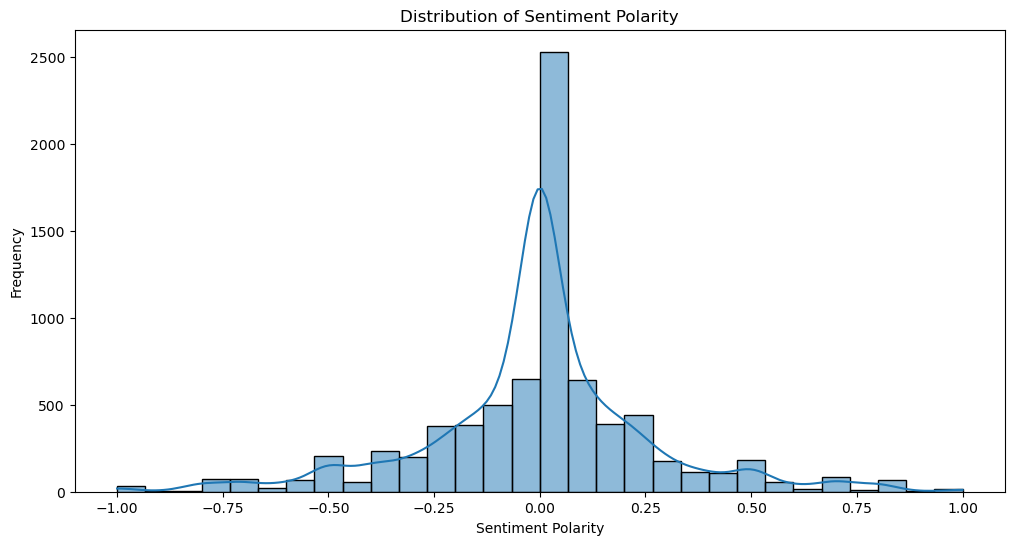

C:\Users\yashika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


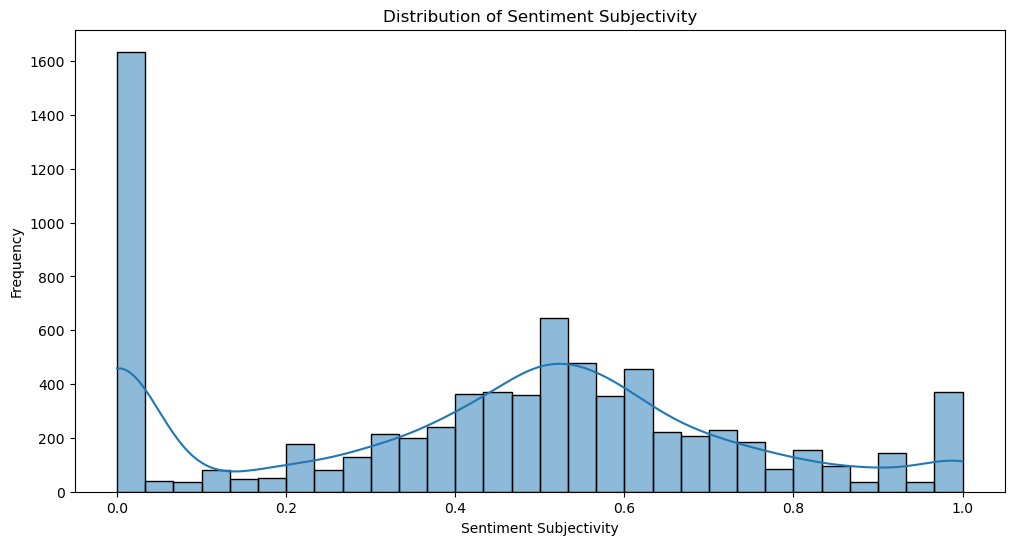

In [25]:
# Sentiment Analysis Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of sentiment polarity
plt.figure(figsize=(12, 6))
sns.histplot(df['sentiment_polarity'], bins=30, kde=True)
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

# Distribution of sentiment subjectivity
plt.figure(figsize=(12, 6))
sns.histplot(df['sentiment_subjectivity'], bins=30, kde=True)
plt.title('Distribution of Sentiment Subjectivity')
plt.xlabel('Sentiment Subjectivity')
plt.ylabel('Frequency')
plt.show()


In [ ]:
from wordcloud import WordCloud

def plot_word_cloud(model, feature_names, title):
    plt.figure(figsize=(10, 10))
    for topic_idx, topic in enumerate(model.components_):
        plt.subplot(2, 3, topic_idx + 1)
        wordcloud = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(dict(zip(feature_names, topic)))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Topic {topic_idx + 1}')
    plt.suptitle(title)
    plt.show()

print("LDA Word Clouds:")
plot_word_cloud(lda, feature_names, 'LDA Topics')

print("\nNMF Word Clouds:")
plot_word_cloud(nmf, feature_names, 'NMF Topics')


   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 435.7 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/300.2 kB 326.8 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/300.2 kB 357.2 kB/s eta 0:00:01
   ------------ ------------------------- 102.4/300.2 kB 420.8 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/300.2 kB 423.5 kB/s eta 0:00:01
   ---------------- --------------------- 133.1/300.2 kB 413.7 kB/s eta 0:00:01
   ----------------------- -------------- 184.3/300.2 kB 506.0 kB/s eta 0:00:01
   ----------------------------- -------- 235.5/300.2 kB 576.2 kB/s eta 0:00:01
   --------------------------------- ---- 266.2/300.2 kB 584.5 kB/s eta 0:00:01
   ------------------------------------ - 286.7/300.2 kB 553.0 kB/s eta 0:00:01
   -------------------------------------- 300.2/300.2 kB 

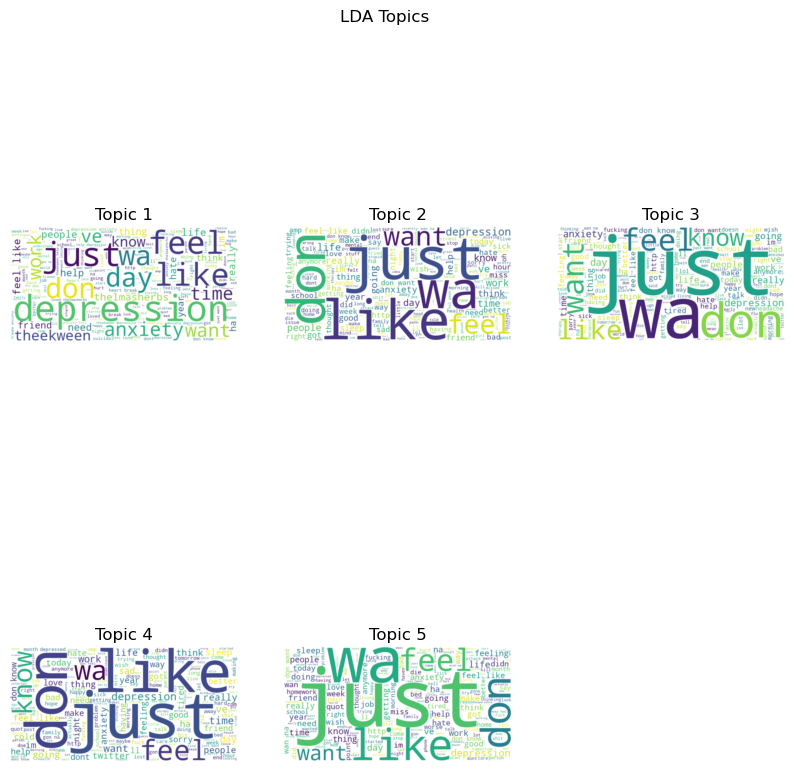


NMF Word Clouds:


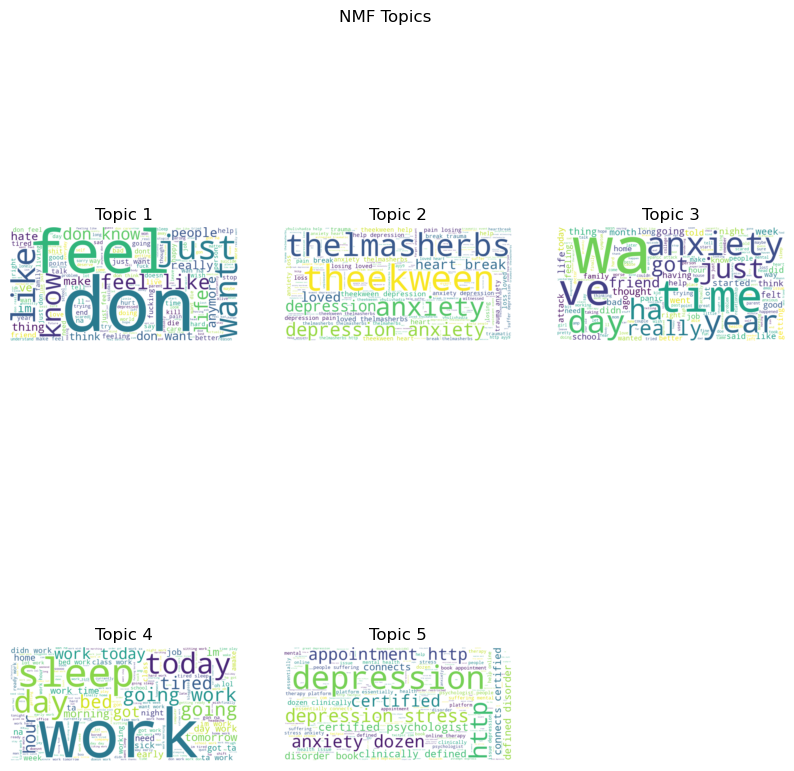

In [27]:
# Topic Modeling Visualization
!pip install matplotlib seaborn wordcloud

from wordcloud import WordCloud

def plot_word_cloud(model, feature_names, title):
    plt.figure(figsize=(10, 10))
    for topic_idx, topic in enumerate(model.components_):
        plt.subplot(2, 3, topic_idx + 1)
        wordcloud = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(dict(zip(feature_names, topic)))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Topic {topic_idx + 1}')
    plt.suptitle(title)
    plt.show()

print("LDA Word Clouds:")
plot_word_cloud(lda, feature_names, 'LDA Topics')

print("\nNMF Word Clouds:")
plot_word_cloud(nmf, feature_names, 'NMF Topics')


LDA Top Words Bar Chart:


C:\Users\yashika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\yashika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\yashika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\yashika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users

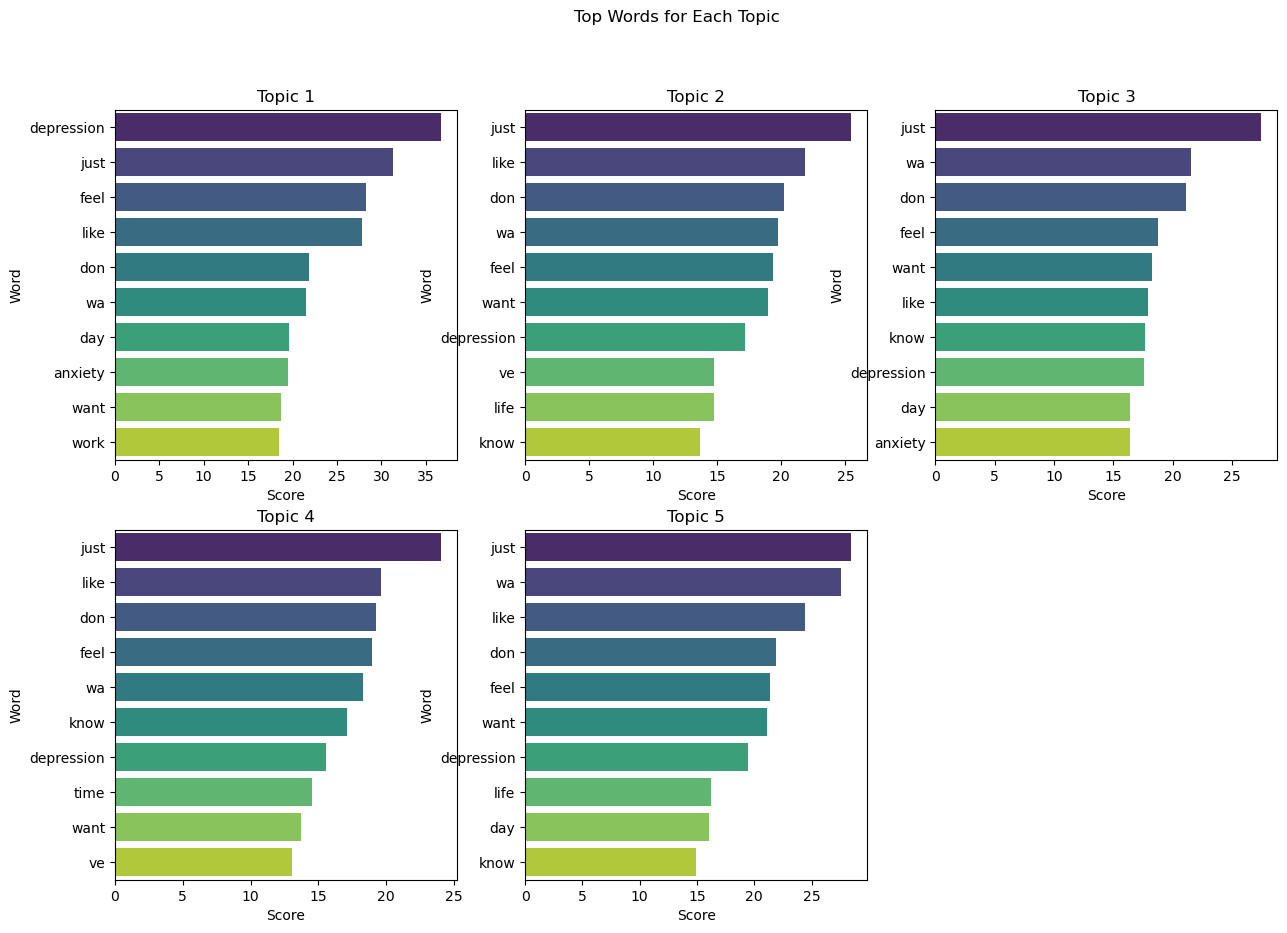


NMF Top Words Bar Chart:


C:\Users\yashika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\yashika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\yashika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\yashika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users

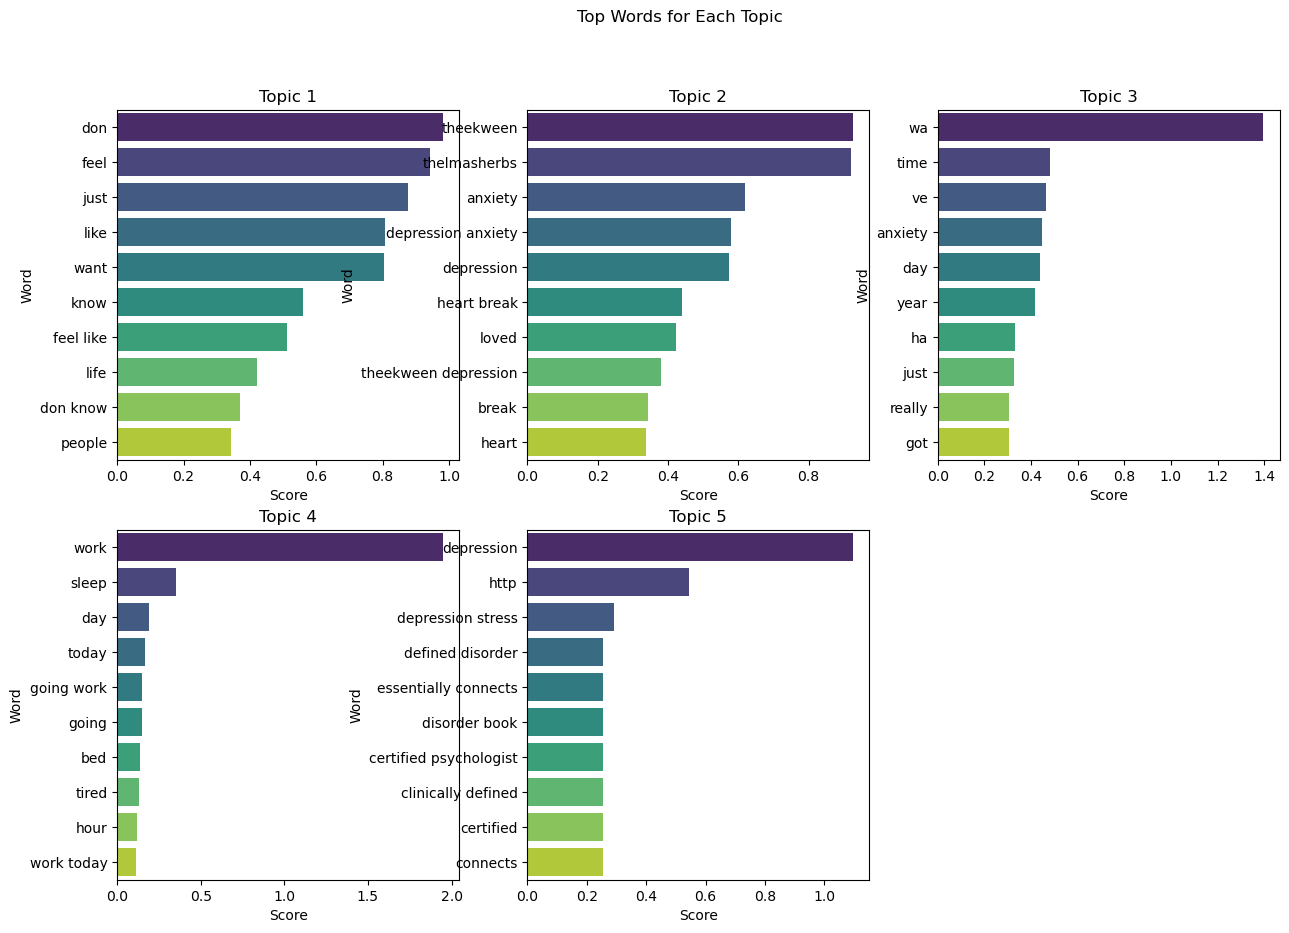

In [28]:
def plot_top_words_bar_chart(model, feature_names, n_words=10):
    plt.figure(figsize=(15, 10))
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[-n_words:][::-1]
        top_words = [feature_names[i] for i in top_words_idx]
        top_word_values = [topic[i] for i in top_words_idx]
        
        plt.subplot(2, 3, topic_idx + 1)
        sns.barplot(x=top_word_values, y=top_words, palette='viridis')
        plt.title(f'Topic {topic_idx + 1}')
        plt.xlabel('Score')
        plt.ylabel('Word')
    plt.suptitle('Top Words for Each Topic')
    plt.show()

print("LDA Top Words Bar Chart:")
plot_top_words_bar_chart(lda, feature_names)

print("\nNMF Top Words Bar Chart:")
plot_top_words_bar_chart(nmf, feature_names)


<Figure size 800x600 with 0 Axes>

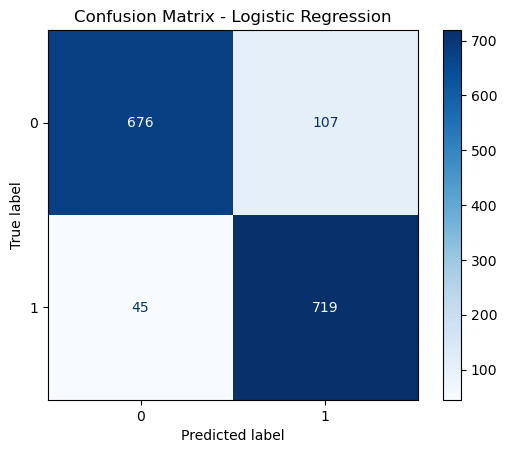

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example for Logistic Regression model
y_pred_log_reg = log_reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred_log_reg, labels=log_reg.classes_)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


In [32]:
# Print classification reports for all models
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Print sentiment analysis results
print("Sample Sentiment Scores:")
print(df[['clean_text', 'sentiment_polarity', 'sentiment_subjectivity']].head())

# Print top words for topics from LDA and NMF
print("LDA Topics:")
print_top_words(lda, feature_names)

print("\nNMF Topics:")
print_top_words(nmf, feature_names)


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       783
           1       0.87      0.94      0.90       764

    accuracy                           0.90      1547
   macro avg       0.90      0.90      0.90      1547
weighted avg       0.90      0.90      0.90      1547

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       783
           1       0.95      0.95      0.95       764

    accuracy                           0.95      1547
   macro avg       0.95      0.95      0.95      1547
weighted avg       0.95      0.95      0.95      1547

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.93       783
           1       0.99      0.87      0.93       764

    accuracy                           0.93      1547
   macro avg       0.